In [99]:
import evaluate
import pandas as pd
import glob
import ast
import os
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Load generated answers

def process_files_to_aggregated_dfs(directory_path):
    # initialize dicts to store QAs
    data_dicts = {
        "qa_eval_set": {},
        "chat_gpt_questions": {},
        "unrelated_topic_questions": {}
    }

    file_pattern = f"{directory_path}/query_response_pairs_hybrid_search*.txt"

    for filename in glob.glob(file_pattern):
        with open(filename, 'r') as file:
            contents = file.read()
            data_list = ast.literal_eval(contents)
            
            # extract unique id from filename
            file_id = os.path.basename(filename).split('.')[0].split('_')[5:]

            if len(data_list) >= 17:
                # Process for qa_eval_set
                for pair in data_list[:10]:  # First 10 for qa_eval_set
                    query, answer = pair
                    if query not in data_dicts["qa_eval_set"]:
                        data_dicts["qa_eval_set"][query] = {"query": query}
                    data_dicts["qa_eval_set"][query][f"answer with hybrid search weights: {file_id[0]}, {file_id[1]}"] = answer
                
                # Process for chat_gpt_questions
                for pair in data_list[10:15]:  # Next 5 for chat_gpt_questions
                    query, answer = pair
                    if query not in data_dicts["chat_gpt_questions"]:
                        data_dicts["chat_gpt_questions"][query] = {"query": query}
                    data_dicts["chat_gpt_questions"][query][f"answer with hybrid search weights: {file_id[0]}, {file_id[1]}"] = answer
                
                # Process for unrelated_topic_questions
                for pair in data_list[-2:]:  # Last 2 for unrelated_topic_questions
                    query, answer = pair
                    if query not in data_dicts["unrelated_topic_questions"]:
                        data_dicts["unrelated_topic_questions"][query] = {"query": query}
                    data_dicts["unrelated_topic_questions"][query][f"answer with hybrid search weights: {file_id[0]}, {file_id[1]}"] = answer

    # Convert dictionaries to DataFrames
    for category, data_dict in data_dicts.items():
        data_dicts[category] = pd.DataFrame.from_dict(data_dict, orient='index').fillna('').reset_index(drop=True)

    return data_dicts["qa_eval_set"], data_dicts["chat_gpt_questions"], data_dicts["unrelated_topic_questions"]

directory_path = './results/hybrid_search'
qa_eval_set_df, chat_gpt_qa_df, unrelated_topic_qa_df = process_files_to_aggregated_dfs(directory_path)


In [86]:
print("QA Eval Set:")
#pd.set_option('display.max_colwidth', None)
print(len(qa_eval_set_df))
qa_eval_set_df.head(1)

QA Eval Set:
10


,query,"answer with hybrid search weights: 08, 02","answer with hybrid search weights: 06, 04","answer with hybrid search weights: 01, 09","answer with hybrid search weights: 1, 0","answer with hybrid search weights: 04, 06","answer with hybrid search weights: 0, 1","answer with hybrid search weights: 02, 08","answer with hybrid search weights: 09, 01","answer with hybrid search weights: 07, 03","answer with hybrid search weights: 05, 05","answer with hybrid search weights: 03, 07"
0,Does tick-borne encephalitis carry a high risk of incomplete recovery in children?,"Based on the provided context, it appears that there is no clear answer to the question about whether tick-borne encephalitis carries a high risk of incomplete recovery in children. The context discusses various aspects of encephalitis in children, including its impact on long-term neurological sequelae and cognitive performance, but does not specifically address the risk of incomplete recovery. It is important to note that the context is limited to specific studies and may not represent the entire population of children with encephalitis. Further research would be needed to provide a definitive answer to this question.","Based on the provided context, it appears that there is no clear answer to the question about whether tick-borne encephalitis carries a high risk of incomplete recovery in children. The context discusses various aspects of encephalitis in children, including its impact on long-term neurological sequelae and cognitive performance, but does not specifically address the risk of incomplete recovery. It is important to note that the context is limited to specific studies and may not represent the entire population of children with encephalitis. Further research would be needed to provide a definitive answer to this question.","Based on the provided abstract, it appears that there is a high prevalence of minor neurological dysfunction (MND) and cognitive impairment in children with encephalitis. Specifically, attention-deficit hyperactivity disorder (ADHD), learning disabilities, and executive function deficits are commonly observed. Additionally, the study suggests that younger age at acute encephalitis is a risk factor for lower cognitive performance. It is important to note that these findings are specific to the population studied and may not necessarily apply to all children with encephalitis.","Based on the provided context, it appears that there is no clear answer to the question about whether tick-borne encephalitis carries a high risk of incomplete recovery in children. The context discusses various aspects of encephalitis in children, including its impact on long-term neurological sequelae, minor neurological dysfunction, and cognitive performance. However, it does not specifically address the risk of incomplete recovery in children with tick-borne encephalitis. Therefore, I cannot provide a definitive answer to this question based solely on the given context.","Based on the provided abstract, it appears that there is a high prevalence of minor neurological dysfunction (MND) and cognitive impairment in children with encephalitis. Specifically, attention-deficit hyperactivity disorder (ADHD), learning disabilities, and executive function deficits are commonly observed. Additionally, the study suggests that younger age at acute encephalitis is a risk factor for lower cognitive performance. It is important to note that these findings are specific to the population studied and may not necessarily apply to all children with encephalitis.","Based on the provided context, the answer is ""Yes."" According to the abstract, two-thirds of the children with tick-borne encephalitis (TBE) experienced residual problems at long-term follow-up, with cognitive problems in areas of executive function and working memory being the most prevalent. Therefore, it appears that an incomplete recovery is a common outcome for these children.","Based on the provided abstr

In [87]:
print("\nChatGPT QA:")
print(len(chat_gpt_qa_df))
#chat_gpt_qa_df.head(1)


ChatGPT QA:
5


In [88]:
print("\nUnrelated Topic QA:")
print(len(unrelated_topic_qa_df))
#unrelated_topic_qa_df.head(1)


Unrelated Topic QA:
2


In [89]:
# Extract queries
qa_eval_queries = qa_eval_set_df["query"].to_list()
# chat_gpt_queries = chat_gpt_qa_df["query"].to_list()
# unrelated_queries = unrelated_topic_qa_df["query"].to_list()


In [90]:
# Load gold truth answers
qa_set = pd.read_csv("../../data/questions_answers/questions_answers.csv")
gold_truth_qa = qa_set[["QUESTION", "LONG_ANSWER"]][qa_set['QUESTION'].isin(qa_eval_queries)]

gold_answers = gold_truth_qa["LONG_ANSWER"].to_list()

gold_truth_qa

,QUESTION,LONG_ANSWER
4,Does emotional intelligence predict breaking bad news skills in pediatric interns?,"We concluded that first-year pediatric residents have inadequate skills in the delivery of bad news. In addition, our data suggest that higher EI alone is not sufficient to effectively deliver death news and more robust skill training is necessary for residents to gain competence and acquire mastery in this important communication domain."
33,Cognitive recovery after severe traumatic brain injury in children/adolescents and adults: similar positive outcome but different underlying pathways?,"(1) No evidence was found for a neuroprotective effect of younger age at STBI; and (2) Coma duration and GOS score predicted neuropsychological recovery in children/adolescents and adults, respectively. This suggests the existence of underlying age-specific recovery processes after STBI."
50,Is language dysfunction associated with age of onset of benign epilepsy with centrotemporal spikes in children?,"Children with BECTS have language difficulties, especially those with earlier disease onset. Early age at seizure onset is a risk factor for language dysfunction in children with BECTS."
54,Is occupational outcome in bipolar disorder predicted by premorbid functioning and intelligence?,"Severe clinical course of BD was associated with receipt of disability benefit. Occupational outcome was unrelated to PAS, premorbid and current IQ, as well as decline in IQ. This suggests that the persistence of severe clinical symptoms, rather than global cognitive functioning, determines occupational outcome in BD and emphasizes the protective potential of early and continuous clinical treatment."
55,Is bilateral hearing loss associated with decreased nonverbal intelligence in US children aged 6 to 16 years?,Bilateral but not unilateral hearing loss is associated with decreased nonverbal intelligence in US children. Longitudinal studies are urgently needed to better understand these associations and their potential impact on future opportunities.
63,Does the CACNA1C risk allele selectively impact on executive function in bipolar type I disorder?,"Our data indicate for the first time that the CACNA1C risk allele is likely associated with executive dysfunction as a trait in BD, as this association was found regardless the presence of mood symptoms. Larger studies should evaluate the potential influence of CACNA1C on other cognitive domains in BD."
86,Does tick-borne encephalitis carry a high risk of incomplete recovery in children?,"A large proportion of children experience an incomplete recovery after TBE with central nervous system involvement. Cognitive problems in areas of executive function and working memory are the most prevalent. Even if mortality and severe sequelae are low in children after TBE, all children should be followed after TBE to detect cognitive deficits."
157,Is the association between intelligence and lifespan mostly genetic?,"The finding of common genetic effects between lifespan and intelligence has important implications for public health, and for those interested in the genetics of intelligence, lifespan or inequalities in health outcomes including lifespan."
159,Are cerebral white matter fractional anisotropy and tract volume as measured by MR imaging associated with impaired cognitive and motor function in pediatric posterior fossa tumor survivors?,DTI provides a method for quantification of WM damage by tumor and by therapy-associated effects in survivors of pediatric posterior fossa tumors. DTI-derived WM integrity may be a representative marker for cognitive and motor deterioration.


**ℹ️ One of the tested questions is unfortunately not available in the QA evaluation set, thus only 9 of our 10 asked question can be evaluated using ground truth results.**

➡️ "What are the effects of α1-antitrypsin (AAT) treatment on chronic fatigue syndrome (CFS) based on a case study involving a 49-year-old woman?" will be deleted.

In [91]:
generated_answers_list = [
    qa_eval_set_df["answer with hybrid search weights: 0, 1"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 01, 09"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 02, 08"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 03, 07"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 04, 06"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 05, 05"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 06, 04"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 07, 03"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 08, 02"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 09, 01"].to_list(),
    qa_eval_set_df["answer with hybrid search weights: 1, 0"].to_list()
]

In [102]:
# Load metrics
bleu = evaluate.load('bleu')
rouge = evaluate.load('rouge')
bertscore = evaluate.load("bertscore")

list_names = ["0.0, 1.0", "0.1, 0.9", "0.2, 0.8", "0.3, 0.7", "0.4, 0.6", "0.5, 0.5", "0.6, 0.4", "0.7, 0.3", "0.8, 0.2", "0.9, 0.1", "1.0, 0.0" ]

def compute_scores(gen_answers_list, gold_truths, names):
    scores = []
    
    for name, gen_answers in zip(names, gen_answers_list):
        gen_answers_copy = gen_answers[:]
        del gen_answers_copy[8]

        bleu_score = bleu.compute(predictions=gen_answers_copy, references=gold_truths)
        rouge_score = rouge.compute(predictions=gen_answers_copy, references=gold_truths)
        bert = bertscore.compute(predictions=gen_answers_copy, references=gold_truths, lang="en")
        bertscore_averaged = {}

        for key in bert.keys():
            if key!='hashcode':
                bertscore_averaged[key]=np.mean(bert[key])

        # save results to file
        with open("results/hybrid_search/bleu_rouge_bert_scores.txt", "a") as file:
            file.write(f"Results for hybrid search weights: {name}\n")
            file.write(f"BLEU Score: {bleu_score}\n")
            file.write(f"ROUGE Score: {rouge_score}\n")
            file.write(f"BERTScore Averaged: {bertscore_averaged}\n\n")

        # return scores for plotting
        scores.append({
            'name': name,
            'bleu': bleu_score,
            'rouge': rouge_score,
            'bertscore': bertscore_averaged
        })

    return scores

scores = compute_scores(generated_answers_list, gold_answers, list_names)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [103]:
print(scores)

[{'name': '0.0, 1.0', 'bleu': {'bleu': 0.022972323956362704, 'precisions': [0.13470533208606175, 0.018867924528301886, 0.011417697431018078, 0.009596928982725527], 'brevity_penalty': 1.0, 'length_ratio': 2.563549160671463, 'translation_length': 1069, 'reference_length': 417}, 'rouge': {'rouge1': 0.17274023963474167, 'rouge2': 0.031147018236700758, 'rougeL': 0.12966324226039966, 'rougeLsum': 0.12950322616892984}, 'bertscore': {'precision': 0.8304332693417867, 'recall': 0.8548348082436455, 'f1': 0.8423760334650675}}, {'name': '0.1, 0.9', 'bleu': {'bleu': 0.022516192094652554, 'precisions': [0.1319838056680162, 0.02202283849918434, 0.010682004930156122, 0.008278145695364239], 'brevity_penalty': 1.0, 'length_ratio': 2.961630695443645, 'translation_length': 1235, 'reference_length': 417}, 'rouge': {'rouge1': 0.18747173300738856, 'rouge2': 0.04004411108986926, 'rougeL': 0.12144152901486147, 'rougeLsum': 0.12056143017290827}, 'bertscore': {'precision': 0.8263057735231187, 'recall': 0.85537973

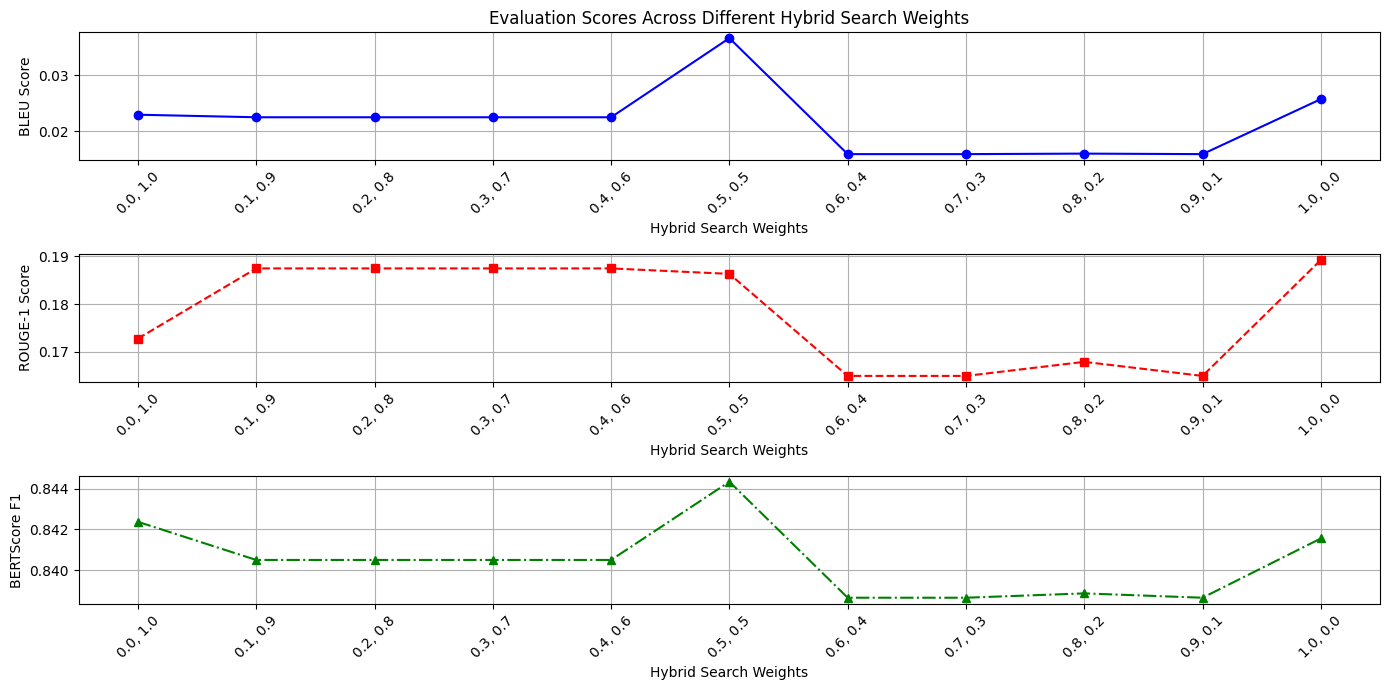

In [105]:
# Plot results
weights = [score['name'] for score in scores]
bleu_scores = [score['bleu']['bleu'] for score in scores]
rouge1_scores = [score['rouge']['rouge1'] for score in scores]
bertscore_f1_scores = [score['bertscore']['f1'] for score in scores]

# BLEU scores
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(weights, bleu_scores, marker='o', linestyle='-', color='blue', label='BLEU Score')
plt.title('Evaluation Scores Across Different Hybrid Search Weights')
plt.xlabel('Hybrid Search Weights')
plt.ylabel('BLEU Score')
plt.xticks(rotation=45)
plt.grid(True)

# ROUGE-1 scores
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(weights, rouge1_scores, marker='s', linestyle='--', color='red', label='ROUGE-1 Score')
plt.xlabel('Hybrid Search Weights')
plt.ylabel('ROUGE-1 Score')
plt.xticks(rotation=45)
plt.grid(True)

# BERTScore F1 scores
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(weights, bertscore_f1_scores, marker='^', linestyle='-.', color='green', label='BERTScore F1')
plt.xlabel('Hybrid Search Weights')
plt.ylabel('BERTScore F1')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

# Save plot
plt.savefig("../../docs/images/bleu_rouge_bert_hybrid_search.png", dpi=150, bbox_inches='tight')
plt.show()